In [2]:
import os
os.chdir('../')

In [3]:
import torch
import torch.nn as nn
import numpy as np
import cv2
from models.mobilenetv2 import mobilenetv2
from torchvision.models import resnet18

In [4]:
resnet_model = resnet18(num_classes=2)
resnet_model.load_state_dict(torch.load('trained_models/resnet18_hyper_8610240.pth'))
#resnet_model.load_state_dict(torch.load("trained_models/mobilenetv2_hyper_14378.pth"))
resnet_model.eval()

mobilenetv2_model = mobilenetv2()
mobilenetv2_model.classifier = nn.Linear(mobilenetv2_model.classifier.in_features, 2)
mobilenetv2_model.load_state_dict(torch.load("chosen_models/mobilenetv2.pth"))
mobilenetv2_model.cuda()

from models.blazeface import BlazeFace

front_net = BlazeFace().to(torch.device('cpu'))
front_net.load_weights("weights/blazeface.pth")
front_net.load_anchors("weights/anchors.npy")

In [20]:
def predict(frame, mobile=False):
    
    mean = np.array([0.4722, 0.3625, 0.3350])
    std = np.array([0.2181, 0.1921, 0.1855])

    frame = frame / 255.0
    frame = ((frame - mean)) / std
    
    inp = torch.from_numpy(frame.astype(np.float32)).unsqueeze(0).permute(0, 3, 1, 2).cuda()
    
    
    if mobile:
        model_out = mobilenetv2_model(inp)
    else:
        model_out = resnet_model(inp)
    
    output = F.log_softmax(model_out, dim=1)
    _, pred = torch.max(output, dim=1)
    print(pred.item())
    if pred.item() == 0:
        return "Negative", (0, 0, 255)
    else:
        return "Positive", (0, 255, 0)
    
    
def read_videos(path, max_frames=5):
    
    vid = cv2.VideoCapture(path)
    frame_count = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = vid.get(cv2.CAP_PROP_FPS)
    frame_pipeline_out = []

    for i in range(frame_count):
        ret, frame = vid.read()

        if not ret or i == max_frames:
            break

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(frame)
        plt.show()

    vid.release()
    
    return frame_count, fps

def read_frame(path, idx=0):
    
    vid = cv2.VideoCapture(path)
    frame_count = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = vid.get(cv2.CAP_PROP_FPS)
    frame_pipeline_out = []

    for i in range(frame_count):
        ret, frame = vid.read()

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        if not ret or i == idx:
            break
            
    vid.release()
    
    return cv2.resize(frame, (128, 128)), frame_count, fps

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_detections(img, detections, with_keypoints=True):
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.grid(False)
    ax.imshow(img)
    
    if isinstance(detections, torch.Tensor):
        detections = detections.cpu().numpy()

    if detections.ndim == 1:
        detections = np.expand_dims(detections, axis=0)

    print("Found %d faces" % detections.shape[0])
        
    for i in range(detections.shape[0]):
        ymin = detections[i, 0] * img.shape[0]
        xmin = detections[i, 1] * img.shape[1]
        ymax = detections[i, 2] * img.shape[0]
        xmax = detections[i, 3] * img.shape[1]

        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 linewidth=1, edgecolor="r", facecolor="none", 
                                 alpha=detections[i, 16])
        ax.add_patch(rect)

        if with_keypoints:
            for k in range(6):
                kp_x = detections[i, 4 + k*2    ] * img.shape[1]
                kp_y = detections[i, 4 + k*2 + 1] * img.shape[0]
                circle = patches.Circle((kp_x, kp_y), radius=0.5, linewidth=1, 
                                        edgecolor="lightskyblue", facecolor="none", 
                                        alpha=detections[i, 16])
                ax.add_patch(circle)
        
    plt.show()
    
def get_face(img, detections, with_keypoints=True):
    
    if isinstance(detections, torch.Tensor):
        detections = detections.cpu().numpy()

    if detections.ndim == 1:
        detections = np.expand_dims(detections, axis=0)

    print("Found %d faces" % detections.shape[0])
        
    for i in range(detections.shape[0]):
        ymin = detections[i, 0] * img.shape[0]
        xmin = detections[i, 1] * img.shape[1]
        ymax = detections[i, 2] * img.shape[0]
        xmax = detections[i, 3] * img.shape[1]

    return ymin, xmin, ymax, xmax

8.641666666666666
Found 1 faces
1
Found 1 faces
1
Found 1 faces
0
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
0
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
1
Found 1 faces
0
Found 1 faces
1
Found 

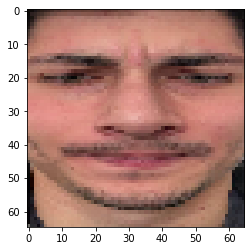

In [35]:
input_file = 'demo_onat_2.mov'
cap = cv2.VideoCapture(f'sample_videos/{input_file}')

resnet_model.cuda()
resnet_model.eval()

fourcc = cv2.VideoWriter_fourcc(*'XVID')
w_frame, h_frame = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps, frames = cap.get(cv2.CAP_PROP_FPS), cap.get(cv2.CAP_PROP_FRAME_COUNT)
out = cv2.VideoWriter(f'sample_outputs/{input_file}', fourcc, fps, (w_frame, h_frame))


print(frames / fps)
count = 0 
flag = True
while(True):
      
    # Capture frames in the video
    ret, frame = cap.read()
    if not ret:
        break
    count += 1
    
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame_rgb = cv2.resize(frame_rgb, (128, 128))
    front_detections = front_net.predict_on_image(frame_rgb)
    ymin, xmin, ymax, xmax = get_face(frame_rgb, front_detections)
    frame_rgb = frame_rgb[int(ymin):int(ymax), int(xmin):int(xmax), :]
    
    if flag:
        plt.imshow(frame_rgb)
        flag = False
    
    label, color = predict(cv2.resize(frame_rgb, (112, 112)), mobile=True)
    
    # describe the type of font
    # to be used.
    font = cv2.FONT_HERSHEY_SIMPLEX
  
    # Use putText() method for
    # inserting text on video
    cv2.putText(frame, 
                label, 
                (50, 50), 
                font, 1, 
                color, 
                2, 
                cv2.LINE_4)

    out.write(frame)  
    # creating 'q' as the quit 
    # button for the video
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
out.release()
cv2.destroyAllWindows()

print(count, frames)

In [ ]:
fourcc = cv2.VideoWriter_fourcc(*'XVID')
w_frame, h_frame = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps, frames = cap.get(cv2.CAP_PROP_FPS), cap.get(cv2.CAP_PROP_FRAME_COUNT)
out = cv2.VideoWriter(, fourcc, fps, (h_frame, w_frame))

    
    while(cap.isOpened()):
        ret, frame = cap.read()
        cnt += 1 # Counting frames
        # Avoid problems when video finish
        if ret==True:
            # Croping the frame
            crop_frame = frame[y:y+w, x:x+h]
            # Percentage
            # xx = cnt *100/frames
            # print(int(xx),'%')
            out.write(crop_frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        else:
            break
    
    print(cnt)

    cap.release()
    out.release()
    cv2.destroyAllWindows()

In [10]:
from data.affwild2_dataset import AffWild2ExprDataset
from torchvision import transforms
from tqdm.notebook import tqdm
from torch.utils.data import DataLoader
import torch.nn.functional as F

mean = [0.4722, 0.3625, 0.3350]
std = [0.2181, 0.1921, 0.1855]

transform_valid = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])
skip = 0
dataset = AffWild2ExprDataset(train=False, skip=skip, remove_mismatch=True,
                                    compress=True, transform=transform_valid, binary=True)

loader = DataLoader(dataset, batch_size=256, shuffle=False)

c = 0
resnet_model.eval()
resnet_model.to(torch.device('cuda:0'))
mobilenetv2_model.eval()
mobilenetv2_model.to(torch.device('cuda:0'))
for (x, y) in tqdm(loader):
    
    x = x.to(torch.device('cuda:0'))
    y = y.to(torch.device('cuda:0'))
    out = resnet_model(x)
    output = F.log_softmax(out, dim=1)
    _, pred = torch.max(output, dim=1)
    c += pred.eq(y).sum()
    
print(f"Original Model Accuracy: {100 * c / (len(dataset))}")


Original Model Accuracy: 85.34652709960938


In [ ]:
def evaluate(model: nn.Module, data_loader: Any, device: torch.device, comment: str = ""):
    
    model.eval()
    
    total_samples = len(data_loader.dataset)
    correct_samples = 0
    total_loss = 0
    loss_history = []

    with torch.no_grad():
        for data, target in tqdm(data_loader):
            data = data.to(device)
            target = target.to(device)
            
            output = F.log_softmax(model(data), dim=1)
            loss = F.nll_loss(output, target, reduction='sum')
            _, pred = torch.max(output, dim=1)

            total_loss += loss.item()
            correct_samples += pred.eq(target).sum()
    
    avg_loss = total_loss / total_samples
    if comment == "val":
        wandb.log({'valid_loss': avg_loss})
    
    accuracy = 100.0 * correct_samples / total_samples
    return accuracy